# Distribution Example
Author: Michael D. Shields
Date: 8/16/18, last modified on 11/10/18 by Audrey Olivier

Import the necessary modules

In [1]:
from UQpy.Distributions import Distribution
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

## Illustrates the Distribution class of UQpy for a lognormal distribution
Define a univariate lognormal distribution.

In [2]:
dist = Distribution(name='lognormal')
print(dist.name)

lognormal


Plot the pdf of the distribution. 
Notice that when calling the pdf, the parameters of the distribution must be specified.

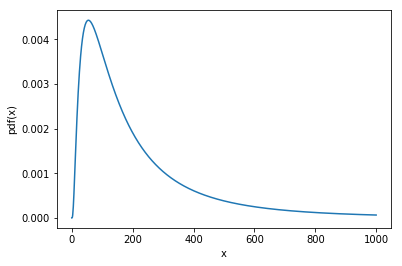

In [3]:
x = np.linspace(0.01,1000,1000)
plt.plot(x, dist.pdf(x, params=[1,0,np.exp(5)]))
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.show()

Print the mean, standard deviation, skewness, and kurtosis of the distribution.
Notice that when calling the moments of the distribution, the paramaters must be specified.

In [4]:
print(dist.moments(params=[1,0,np.exp(5)]))

[2.44691932e+02 1.02880650e+05 6.18487714e+00 1.10936392e+02]


Plot the log pdf of the distribution. 
Notice that when calling the log_pdf, the parameters of the distribution must be specified.

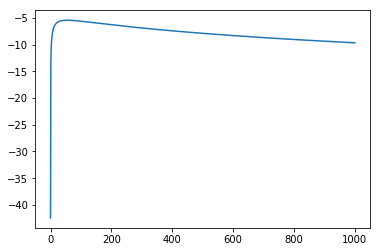

In [5]:
plt.plot(x, dist.log_pdf(x, params=[1,0,np.exp(5)]))
plt.show()

Generate 1000 random samples from the lognormal distribution.
Notice that when calling rvs, both the parameters and the number of samples must be specified.

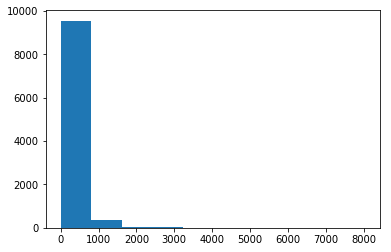

In [6]:
y = dist.rvs(params=[1,0,np.exp(5)], nsamples=10000)
plt.hist(y)
plt.show()

Estimate the parameters of the lognormal distribution based on the samples generated above. Notice that fit returns three parameters (s, loc, and scale) that correspond to the scipy.stats parameters for the distribution.

In [7]:
print(dist.fit(y))

(0.988756728350167, -0.6111127331216353, 148.81166001012969)


## Example with a custom distribution: file custom_dist.py

custom_dist


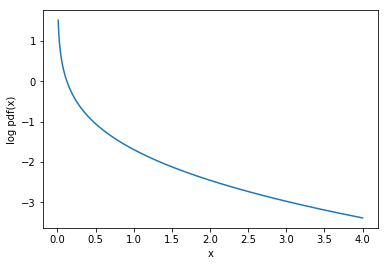

In [8]:
dist = Distribution(name='custom_dist')
print(dist.name)

x = np.linspace(0.01,4,1000)
plt.plot(x, dist.log_pdf(x, params=[1,0.5]))
plt.xlabel('x')
plt.ylabel('log pdf(x)')
plt.show()

## Example of a multivariate distribution provided with independent marginals

Create a bivariate distribution as a product of two independent univariate distributions: a normal and a lognormal. Then draw some random samples (left plot below) and plot the pdf (right contour plot).

In [9]:
dist = Distribution(name=['normal', 'lognormal'])
print(dist.name)
params_dist = [[2,2],[1,0,np.exp(5)]]

['normal', 'lognormal']


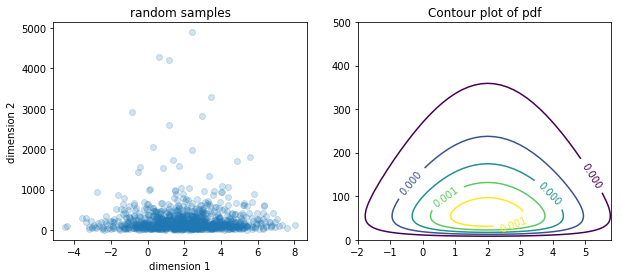

In [10]:
y = dist.rvs(params=params_dist, nsamples=1000)
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].scatter(y[:,0], y[:,1], alpha=0.2)
ax[0].set_xlabel('dimension 1')
ax[0].set_ylabel('dimension 2')
ax[0].set_title('random samples')

x = np.arange(-2.0, 6.0, 0.2)
y = np.arange(0.01, 500, 1)
X, Y = np.meshgrid(x, y)
Z = dist.pdf(x = np.concatenate([X.reshape((-1,1)),Y.reshape((-1,1))], axis=1), params=params_dist)
CS = ax[1].contour(X, Y, Z.reshape(X.shape))
ax[1].clabel(CS, inline=1, fontsize=10)
ax[1].set_title('Contour plot of pdf')
plt.show()

## Example of a multivariate distribution provided with marginals and copula

In [11]:
dist_1 = Distribution(name=['normal', 'normal'])
params_dist = [[0, 1], [0, 1]]

dist_2 = Distribution(name=['normal', 'normal'], copula='gumbel')
params_c = 2

First look at two independent normals.

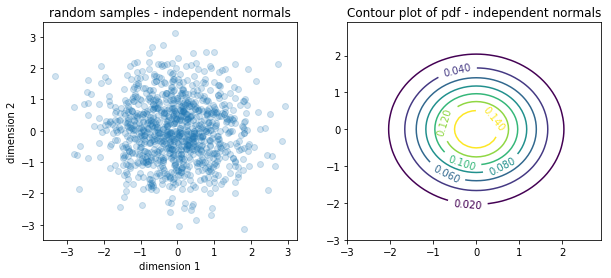

In [12]:
y = dist_1.rvs(params=params_dist, nsamples=1000)
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].scatter(y[:,0], y[:,1], alpha=0.2)
ax[0].set_xlabel('dimension 1')
ax[0].set_ylabel('dimension 2')
ax[0].set_title('random samples - independent normals')

x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x, y)
Z = dist_1.pdf(x = np.concatenate([X.reshape((-1,1)),Y.reshape((-1,1))], axis=1), params=params_dist)
CS = ax[1].contour(X, Y, Z.reshape(X.shape))
ax[1].clabel(CS, inline=1, fontsize=10)
ax[1].set_title('Contour plot of pdf - independent normals')
plt.show()

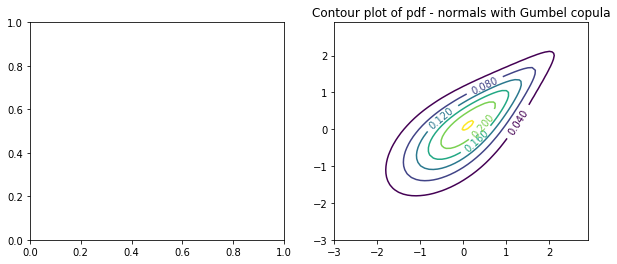

In [13]:
#y = dist_1.rvs(params=params_dist, nsamples=1000)
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
#ax[0].scatter(y[:,0], y[:,1], alpha=0.2)
#ax[0].set_xlabel('dimension 1')
#ax[0].set_ylabel('dimension 2')
#ax[0].set_title('random samples - independent normals')

x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x, y)
Z = dist_2.pdf(x = np.concatenate([X.reshape((-1,1)),Y.reshape((-1,1))], axis=1), params=params_dist,
              copula_params = params_c)
CS = ax[1].contour(X, Y, Z.reshape(X.shape))
ax[1].clabel(CS, inline=1, fontsize=10)
ax[1].set_title('Contour plot of pdf - normals with Gumbel copula')
plt.show()